# 1. Setup Mario

In [11]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [12]:
# Import the game
import gym
# Import the oJoypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [13]:
# Important simplify game environnement

# Setup game
env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [14]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(1000):
    # Start the game to begin with
    if done:
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

/opt/anaconda3/lib/python3.8/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# 2. Preprocess Environement


In [15]:
# Install pytorch
!pip3 install torch torchvision torchaudio

In [16]:
!pip install stable-baselines3[extra]

zsh:1: no matches found: stable-baselines3[extra]


In [17]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [18]:
# 1. Create the base environment
env = gym.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env,keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda :env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [19]:
state = env.reset()


In [20]:
state.shape

(1, 240, 256, 4)

In [21]:
state, reward, done, info = env.step([5])

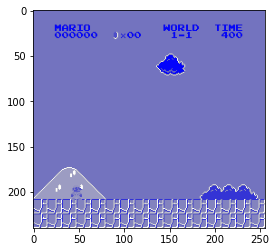

In [22]:
plt.imshow(state[0])

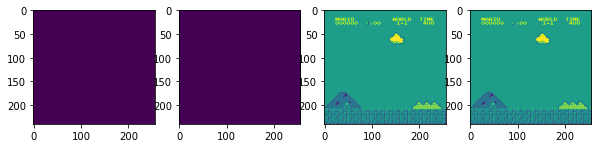

In [23]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])

# Train the RL Model

In [24]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [25]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [26]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [27]:
callback = TrainAndLoggingCallback(check_freq=100000,save_path=CHECKPOINT_DIR)

In [ ]:
model = PPO('CnnPolicy', env, verbose=1,tensorboard_log=LOG_DIR,learning_rate=0.000001,
            n_steps=512)


Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train de AI model
model.learn(total_timesteps=1000000, callback=callback)